In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train=ImageDataGenerator(featurewise_center=True,
                        featurewise_std_normalization=True)

In [3]:
train=ImageDataGenerator(1.0/255)
test=ImageDataGenerator(1.0/255)

In [4]:
train_data=train.flow_from_directory('Traffic_Sign/Train/',
                                    target_size=(224,224),
                                    color_mode='rgb',
                                    batch_size=16,
                                    class_mode='categorical')

Found 104730 images belonging to 43 classes.


In [5]:
test_data=test.flow_from_directory('Traffic_Sign/Test/',
                                  target_size=(224,224),
                                  color_mode='rgb',
                                  batch_size=16,
                                  class_mode='categorical')

Found 23793 images belonging to 43 classes.


In [6]:
model=keras.Sequential([
    keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32, (2,2), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64, (2,2), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(128, (2,2), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(43, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       3

In [8]:
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [13]:
Model=model.fit(train_data,
          epochs=30,
         validation_data=test_data,
         steps_per_epoch=len(train_data)/16,
        validation_steps=len(test_data)/16)

C:\Users\hp\.conda\envs\Tensor\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
410/409 [==============================] - 541s 1s/step - loss: 0.3217 - accuracy: 0.9027 - val_loss: 0.4605 - val_accuracy: 0.8790
Epoch 2/30
410/409 [==============================] - 388s 947ms/step - loss: 0.3277 - accuracy: 0.9002 - val_loss: 0.2777 - val_accuracy: 0.9207
Epoch 3/30
410/409 [==============================] - 362s 883ms/step - loss: 0.3075 - accuracy: 0.9041 - val_loss: 0.2305 - val_accuracy: 0.9288
Epoch 4/30
410/409 [==============================] - 361s 880ms/step - loss: 0.3329 - accuracy: 0.9044 - val_loss: 0.3796 - val_accuracy: 0.8858
Epoch 5/30
410/409 [==============================] - 338s 825ms/step - loss: 0.3104 - accuracy: 0.9073 - val_loss: 0.2955 - val_accuracy: 0.9160
Epoch 6/30
410/409 [==============================] - 418s 1s/step - loss: 0.3587 - accuracy: 0.9032 - val_loss: 0.2403 - val_accuracy: 0.9247
Epoch 7/30
410/409 [==============================] - 357s 871ms/step - loss: 0.2830 - accuracy: 0.9171 - val_loss: 0.2768 - val_a

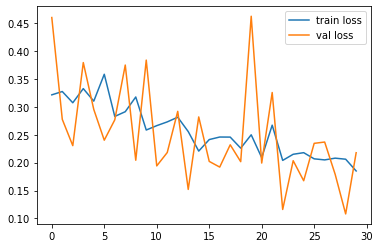

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(Model.history['loss'], label='train loss')
plt.plot(Model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

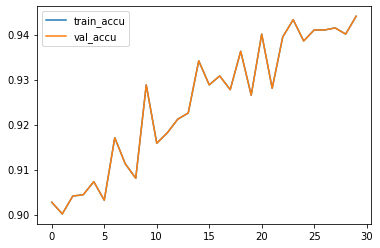

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(Model.history['accuracy'], label='train_accu')
plt.plot(Model.history['accuracy'], label='val_accu')
plt.legend()
plt.show()
plt.savefig('AccuVal_accu')

In [25]:
model.save('Traffic_sign.h5')